In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
import matplotlib

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split





font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc("font",size=15)


from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  

pd.set_option('display.max_row', 5000)
pd.set_option('display.max_columns', 100)

# Data Load

In [2]:
trash=pd.read_csv("C:\\Users\\User\\BigData\\bigdata\\project/trash.csv",encoding='cp949')
print(trash.shape)
trash.head(5)

(15168, 9)


,년도,수거지역,분류,상세분류,개수,위도,경도,월,측정소
0,2019,통영 망일봉,플라스틱류,"끈(노끈, 포장용끈)",1,34.84861,128.430967,1,통영
1,2019,통영 망일봉,금속,"캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등",1,34.84861,128.430967,1,통영
2,2019,통영 망일봉,목재,"나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, ...",1,34.84861,128.430967,1,통영
3,2019,통영 망일봉,종이,"종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등",1,34.84861,128.430967,1,통영
4,2019,통영 망일봉,천연 섬유,"옷, 모자, 양말, 천, 장갑(면장갑, 목장갑, 코팅목장갑) 등 천연 섬유만 해당",1,34.84861,128.430967,1,통영


In [3]:
wind=pd.read_csv("C:\\Users\\User\\BigData\\bigdata\\project/wind_avg.csv",encoding='cp949')
print(wind.shape)
wind.head(5)

(936, 5)


,년도,월,평균풍향(deg),평균풍속(m/s),측정소
0,2008,1,156.062331,3.253527,거제도
1,2008,2,188.422334,2.228063,거제도
2,2008,3,152.323432,3.197278,거제도
3,2008,4,152.292539,3.180208,거제도
4,2008,5,154.370810,3.276091,거제도


In [4]:
visit_beach=pd.read_csv("C:\\Users\\User\\BigData\\bigdata\\project/merge_beach.csv",encoding='cp949')
print(visit_beach.shape)
visit_beach.head(5)

(478, 6)


,수거지역,해수욕장명,수거장소에 대한해수욕장의 상대적 위치,년도,월,방문객수
0,거제 두모몽돌해변,구영해수욕장,북,2019,8,1940
1,거제 두모몽돌해변,구영해수욕장,북,2019,7,688
2,거제 두모몽돌해변,구영해수욕장,북,2018,8,1060
3,거제 두모몽돌해변,구영해수욕장,북,2018,7,997
4,거제 두모몽돌해변,구영해수욕장,북,2017,8,2980


In [5]:
harbor=pd.read_csv("C:\\Users\\User\\BigData\\bigdata\\project/harbor.csv",encoding='cp949')
print(visit_beach.shape)
visit_beach.head(5)

(478, 6)


,수거지역,해수욕장명,수거장소에 대한해수욕장의 상대적 위치,년도,월,방문객수
0,거제 두모몽돌해변,구영해수욕장,북,2019,8,1940
1,거제 두모몽돌해변,구영해수욕장,북,2019,7,688
2,거제 두모몽돌해변,구영해수욕장,북,2018,8,1060
3,거제 두모몽돌해변,구영해수욕장,북,2018,7,997
4,거제 두모몽돌해변,구영해수욕장,북,2017,8,2980


# EDA--------------------------------------------------------------------------------------------------------------------------------------------

# 1. 전체 기간

### 1-1. 수집기간 동안 총 쓰레기 수 변화

In [748]:
year_month_cnt_pivot=trash.pivot_table(index=['년도','월'],
                 values='개수',
                 aggfunc=sum).reset_index()

In [749]:
year_month_cnt_pivot

,년도,월,개수
0,2008,3,1515
1,2008,5,1759
2,2008,7,1502
3,2008,9,1749
4,2008,11,1807
5,2009,1,2164
6,2009,3,3084
7,2009,5,2887
8,2009,7,2828
9,2009,9,2465


In [750]:
year_pivot=year_month_cnt_pivot.pivot_table(index='년도',
                 values='개수',
                 aggfunc=sum).reset_index()

In [751]:
year_pivot

,년도,개수
0,2008,8332
1,2009,15867
2,2010,17092
3,2011,16762
4,2012,16430
5,2013,9745
6,2014,17474
7,2015,22656
8,2016,23055
9,2017,23926


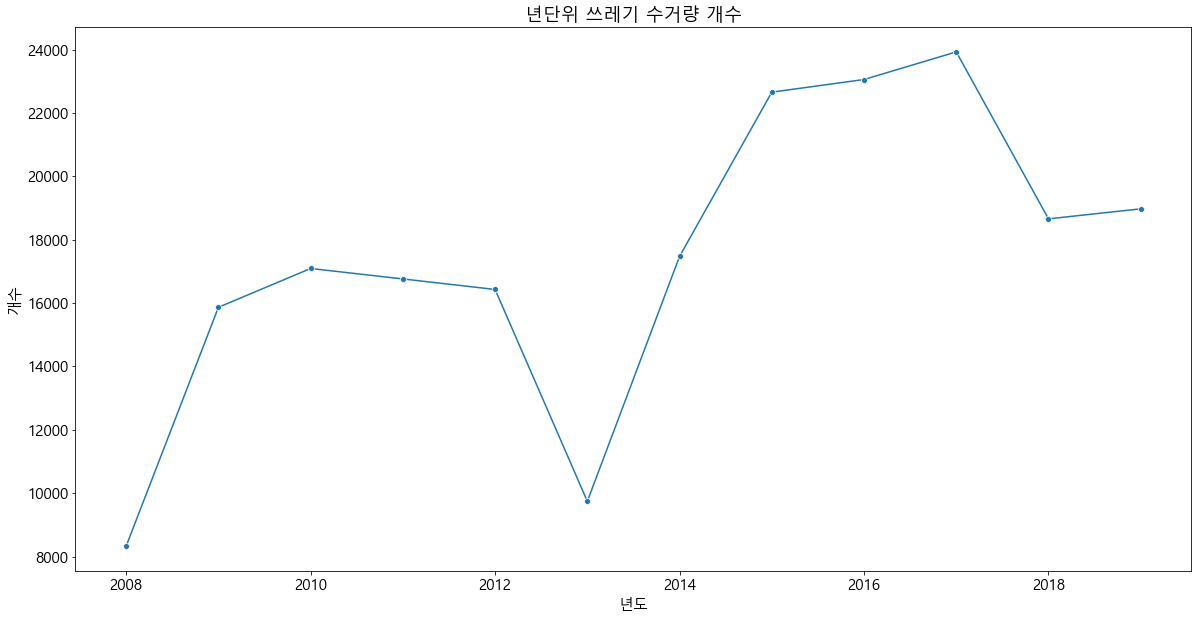

In [752]:
#년단위
plt.figure(figsize=(20,10))
sns.lineplot(x=year_pivot['년도'],y=year_pivot['개수'],marker='o',ci=None)
plt.title("년단위 쓰레기 수거량 개수")
plt.show()

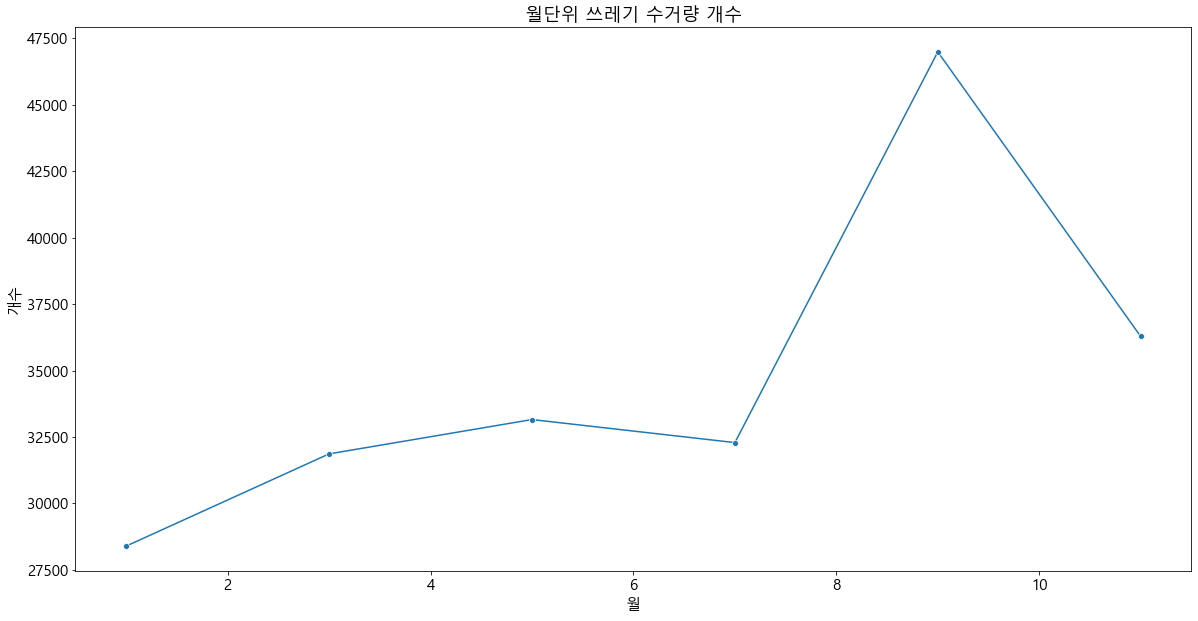

In [753]:
#월단위
month_pivot=year_month_cnt_pivot.pivot_table(index='월',
                 values='개수',
                 aggfunc=sum).reset_index()

plt.figure(figsize=(20,10))
sns.lineplot(x=month_pivot['월'],y=month_pivot['개수'],marker='o',ci=None)
plt.title("월단위 쓰레기 수거량 개수")
plt.show()

### 1-2. 각 수집장소별 유형별 갯수(합) 

In [761]:
loc_type_pivot=trash.pivot_table(index=['수거지역','분류'],
                 values='개수',
                 aggfunc=sum).reset_index()

In [763]:
loc_type_pivot.head(10)

,수거지역,분류,개수
0,거제 두모몽돌해변,고무,114
1,거제 두모몽돌해변,금속,1552
2,거제 두모몽돌해변,기타(+혼합재질),900
3,거제 두모몽돌해변,"기타(스폰지, 물휴지 등)",38
4,거제 두모몽돌해변,기타(일회용 위생장갑 등),63
5,거제 두모몽돌해변,목재,485
6,거제 두모몽돌해변,스티로폼,3987
7,거제 두모몽돌해변,"식품용기-음식물포장용, 컵라면, 도시락 등",190
8,거제 두모몽돌해변,양식용 화학약품 용기,8
9,거제 두모몽돌해변,어업용고기상자,1


[]

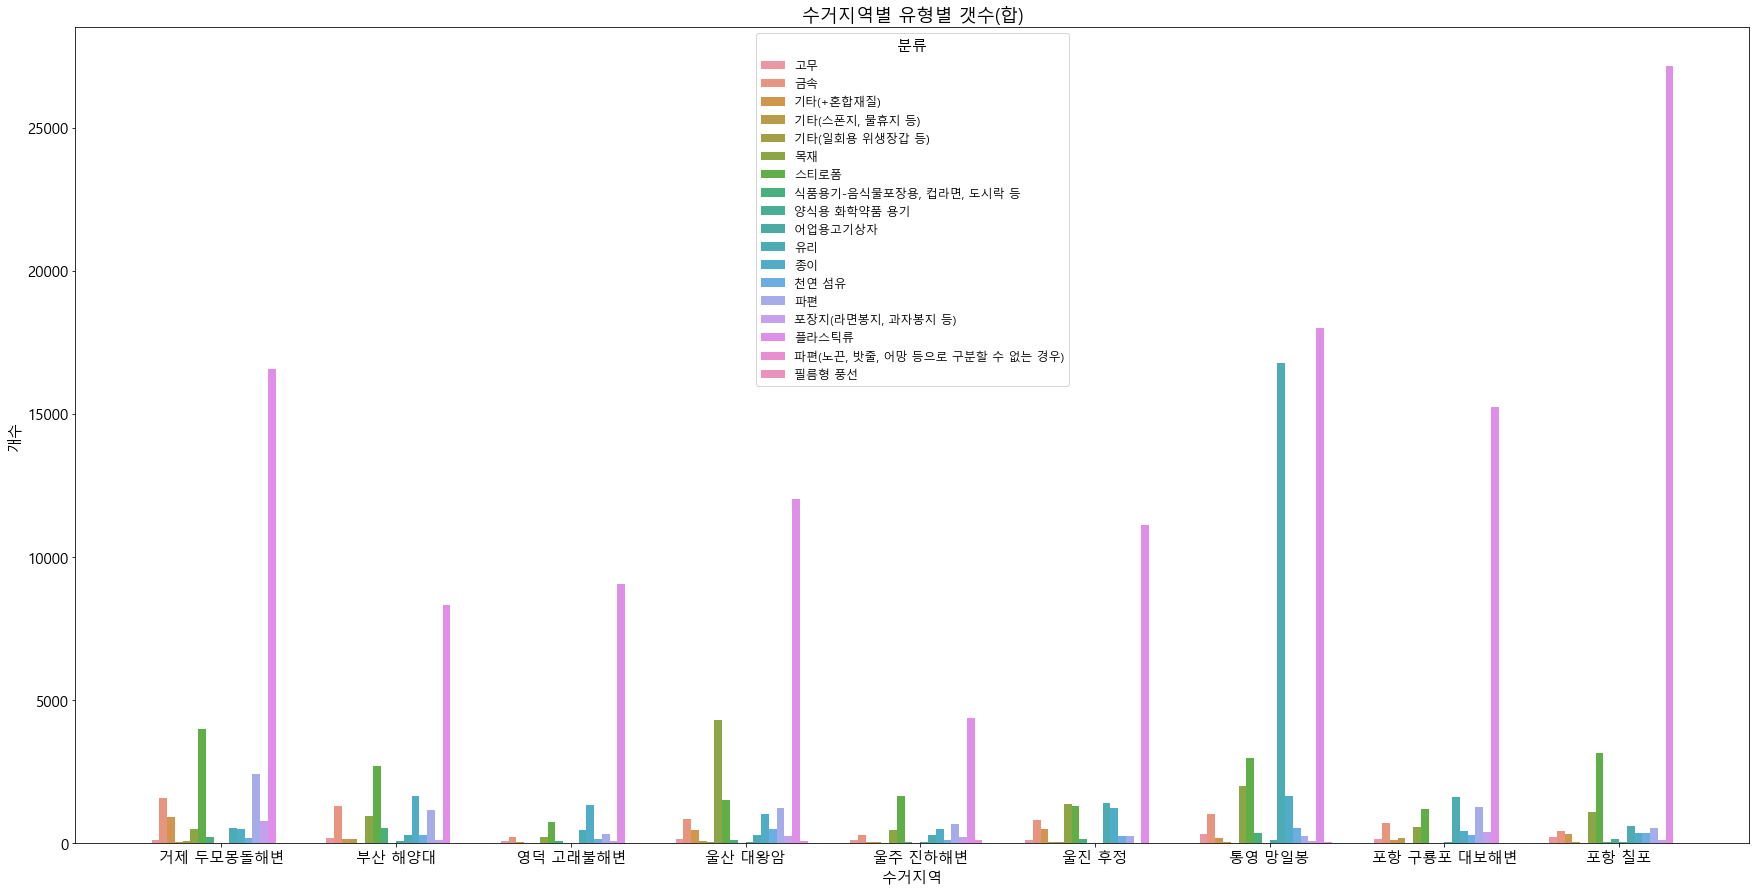

In [764]:
plt.figure(figsize=(30, 15))
sns.barplot(data=loc_type_pivot,x='수거지역',y='개수',hue='분류',ci=None)
plt.title("수거지역별 유형별 갯수(합)")
plt.plot()

In [765]:
# 수거장소별 top3 유형
sort_pivot=loc_type_pivot.sort_values(['수거지역','개수'],ascending=False).head(50)

In [766]:
top3_df=pd.DataFrame(loc_type_pivot.groupby(['수거지역', '분류'])['개수'].agg('sum').groupby(level=0).nlargest(3)).droplevel(0).reset_index()

[]

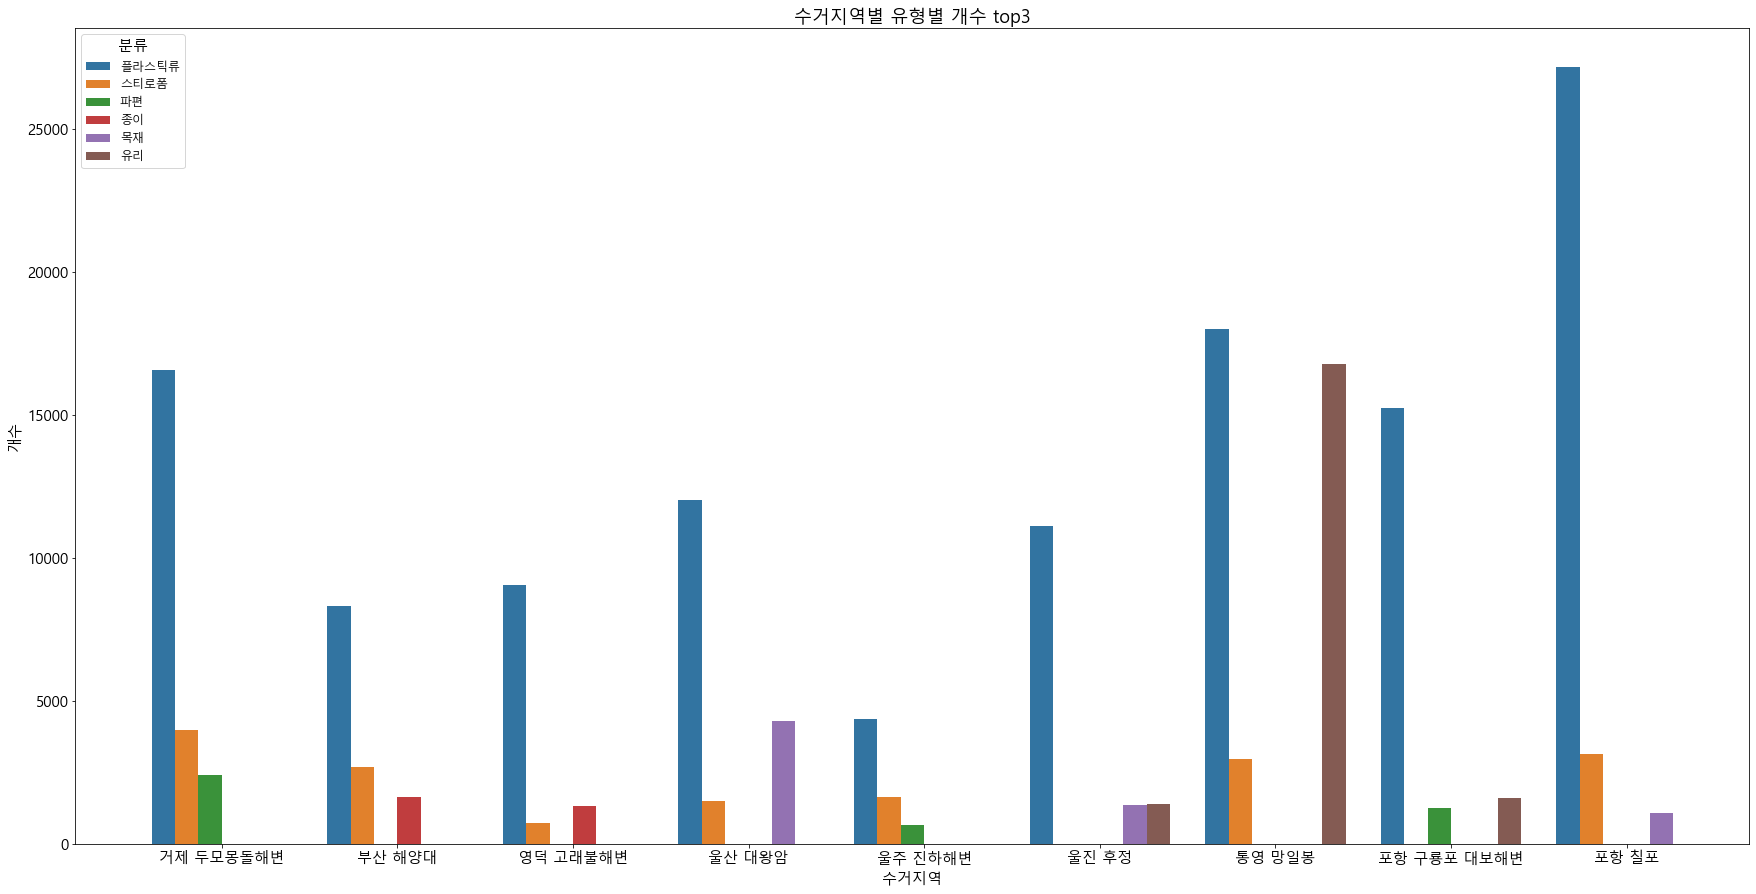

In [767]:
plt.figure(figsize=(30, 15))
sns.barplot(data=top3_df,x='수거지역',y='개수',hue='분류',ci=None)
plt.title("수거지역별 유형별 개수 top3")

plt.plot()

플라스틱이 가장 많다는 것을 확실히 볼 수 있고</br>
마산봉암 갯벌은 스티로폼이,</br>
통영 망일봉은 유리가 다른지역에 비해 많이 발견되는 것을 알 수 있다.

In [768]:
top3_df.head(20)

,수거지역,분류,개수
0,거제 두모몽돌해변,플라스틱류,16575
1,거제 두모몽돌해변,스티로폼,3987
2,거제 두모몽돌해변,파편,2403
3,부산 해양대,플라스틱류,8308
4,부산 해양대,스티로폼,2685
5,부산 해양대,종이,1623
6,영덕 고래불해변,플라스틱류,9055
7,영덕 고래불해변,종이,1317
8,영덕 고래불해변,스티로폼,736
9,울산 대왕암,플라스틱류,12009


### 1-3. 월별 top3 분류중의 변화

# 통계분석 --------------------------------------------------------------------------------------------------------------------------------------

# 1. 카이제곱 검정

###  1-1. 지역과 쓰레기 유형에 따른 쓰레기 관측 기대빈도가 다른가

In [769]:
cross_table=loc_type_pivot.pivot("수거지역", "분류", "개수")
cross_table=cross_table.fillna(0)
cross_table

분류,고무,금속,기타(+혼합재질),"기타(스폰지, 물휴지 등)",기타(일회용 위생장갑 등),목재,스티로폼,"식품용기-음식물포장용, 컵라면, 도시락 등",양식용 화학약품 용기,어업용고기상자,유리,종이,천연 섬유,파편,"파편(노끈, 밧줄, 어망 등으로 구분할 수 없는 경우)","포장지(라면봉지, 과자봉지 등)",플라스틱류,필름형 풍선
수거지역,,,,,,,,,,,,,,,,,,
거제 두모몽돌해변,114.0,1552.0,900.0,38.0,63.0,485.0,3987.0,190.0,8.0,1.0,508.0,483.0,175.0,2403.0,0.0,758.0,16575.0,0.0
부산 해양대,153.0,1284.0,139.0,139.0,6.0,941.0,2685.0,526.0,5.0,56.0,283.0,1623.0,271.0,1154.0,2.0,115.0,8308.0,2.0
영덕 고래불해변,67.0,211.0,18.0,3.0,4.0,216.0,736.0,67.0,8.0,4.0,442.0,1317.0,117.0,312.0,4.0,60.0,9055.0,0.0
울산 대왕암,119.0,822.0,444.0,59.0,30.0,4280.0,1491.0,82.0,7.0,13.0,283.0,1008.0,495.0,1230.0,46.0,249.0,12009.0,0.0
울주 진하해변,113.0,284.0,38.0,23.0,4.0,452.0,1619.0,36.0,10.0,24.0,279.0,473.0,90.0,674.0,114.0,205.0,4365.0,0.0
울진 후정,96.0,812.0,491.0,39.0,17.0,1363.0,1278.0,124.0,10.0,3.0,1377.0,1229.0,238.0,234.0,5.0,8.0,11105.0,0.0
통영 망일봉,304.0,1022.0,175.0,12.0,2.0,1975.0,2957.0,329.0,10.0,98.0,16784.0,1627.0,525.0,248.0,11.0,69.0,18006.0,6.0
포항 구룡포 대보해변,124.0,685.0,110.0,151.0,7.0,560.0,1185.0,2.0,3.0,27.0,1610.0,409.0,258.0,1268.0,3.0,367.0,15233.0,0.0
포항 칠포,187.0,399.0,311.0,11.0,10.0,1089.0,3125.0,15.0,136.0,18.0,596.0,327.0,341.0,522.0,0.0,106.0,27144.0,0.0


In [770]:
import scipy.stats

chi2, pvalue, dof, expected = scipy.stats.chi2_contingency(cross_table)

In [771]:
chi2

79545.00411751491

In [772]:
dof

136

In [773]:
pvalue
# 결론 : 수거장소와 유형은 서로 독립이 아님

0.0

# 2. 상관분석

### 2-1. 해수욕장 관람객 수 vs 해수욕장에서 나올만한 쓰레기 유형의 관계

In [774]:
trash=pd.read_csv("C:\\Users\\User\\BigData\\bigdata\\project/trash.csv",encoding='cp949')
trash_beach_list=trash[(trash['상세분류']=='캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등')|
                 (trash['상세분류']=='나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, 꼬지 등')|
                 (trash['상세분류']=='스티로폼 식품용기(음식물포장용, 컵라면, 도시락, 과일포장 등)')|
                 (trash['상세분류']=='음료수병, 농약병, 전구, 형광등, 유리조각(2.5㎝ 이상) 등')|
                 (trash['상세분류']=='종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등')|
                 (trash['상세분류']=='음료수병, 각종 뚜껑')|
                 (trash['상세분류']=='비닐봉지')|
                 (trash['상세분류']=='1회용품 접시·숟가락·빨대 등')|
                 (trash['상세분류']=='음식물포장용기(고추장통, 간장병 등)')|
                 (trash['상세분류']=='폭죽/불꽃놀이 용품')|
                 (trash['상세분류']=='종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등')|
                 (trash['상세분류']=='담배꽁초')|
                 (trash['상세분류']=='라이터')]

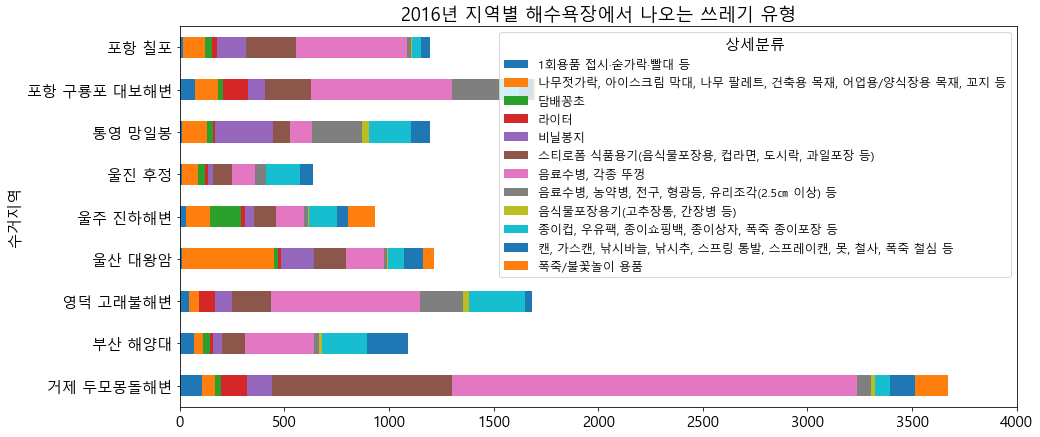

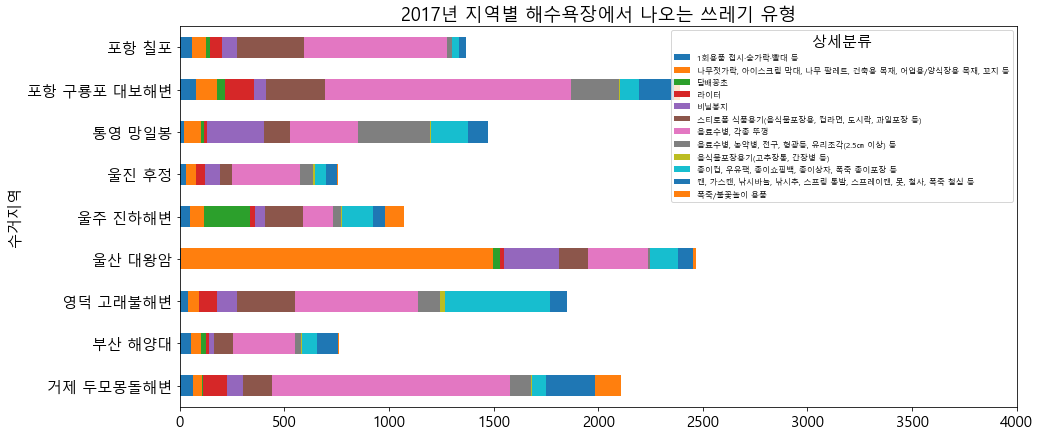

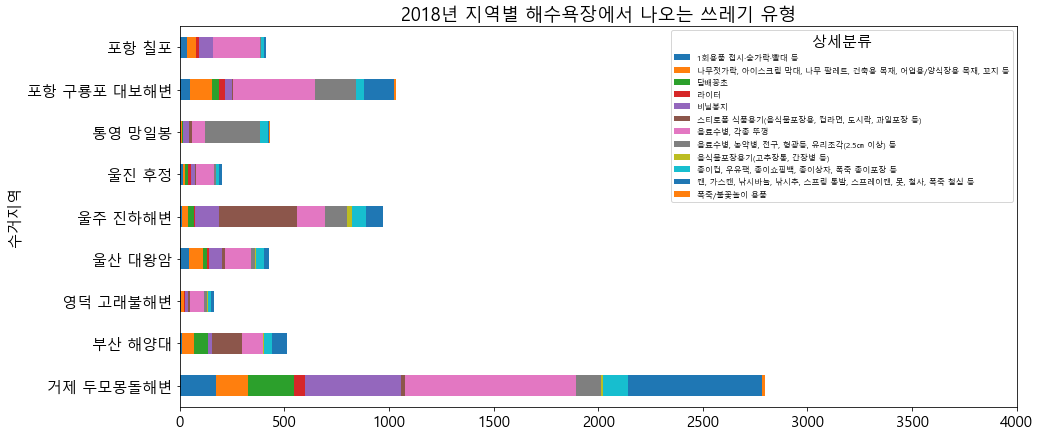

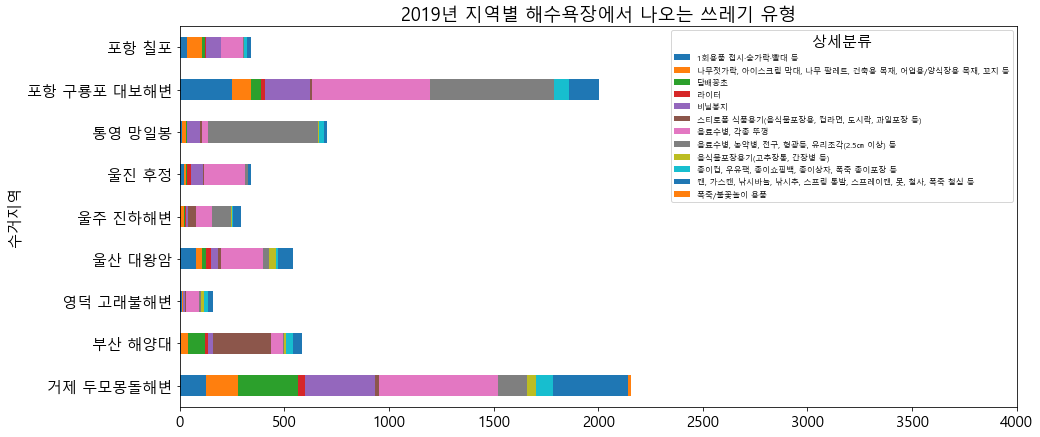

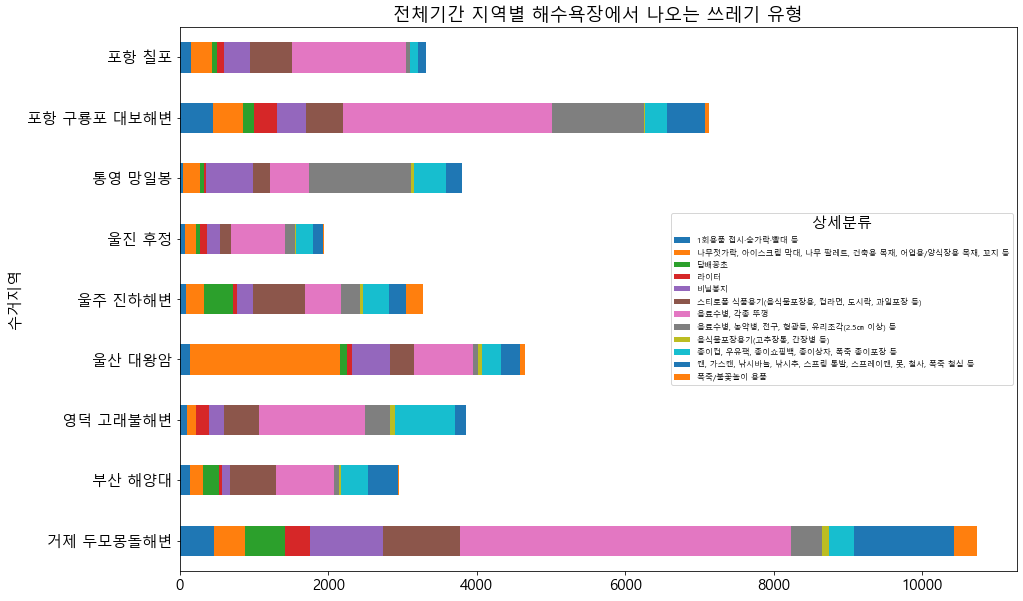

In [775]:
for i in range(2016,2020):
    trash_beach=trash_beach_list[trash_beach_list['년도']==i]
    쓰상=trash_beach.pivot_table(index=['수거지역','상세분류'],values='개수',aggfunc='sum').reset_index()
    a_pivot=쓰상.pivot('수거지역','상세분류','개수')
    plt.rcParams["figure.figsize"] = (15, 7)
    a_pivot.plot.barh( stacked=True)
    plt.rc('legend', fontsize=8)
    plt.title(str(i)+"년 지역별 해수욕장에서 나오는 쓰레기 유형")
    plt.xlim((0,4000))
    plt.show()
    
    
trash_beach=trash_beach_list[trash_beach_list['년도']>=2016]
쓰상=trash_beach.pivot_table(index=['수거지역','상세분류'],values='개수',aggfunc='sum').reset_index()
a_pivot=쓰상.pivot('수거지역','상세분류','개수')
plt.rcParams["figure.figsize"] = (15, 10)
a_pivot.plot.barh( stacked=True)
plt.rc('legend', fontsize=12)
plt.title("전체기간 지역별 해수욕장에서 나오는 쓰레기 유형")
plt.show()

2016년 울산 대왕암이 방문객수가 압도적으로 많았음에도 불구하고</br>
쓰레기량은 많지 않았다.
반면 거제는 일회용품관련 너무 많이 나오기 때문에 시민의식 개선, 규제를 필요하다 

In [776]:
a=trash[trash['년도']==2019][['분류','상세분류']]
a.drop_duplicates().sort_values('분류').reset_index(drop=True).to_csv("최근.csv",encoding='cp949')

In [777]:
pd.set_option('display.max_rows', 300)
b=trash[trash['년도']<2018][['분류','상세분류']]
b.drop_duplicates().sort_values('분류').reset_index(drop=True).to_csv("과거.csv",encoding='cp949')

월별 해수욕장에서 나오는 쓰레기 종류 파악

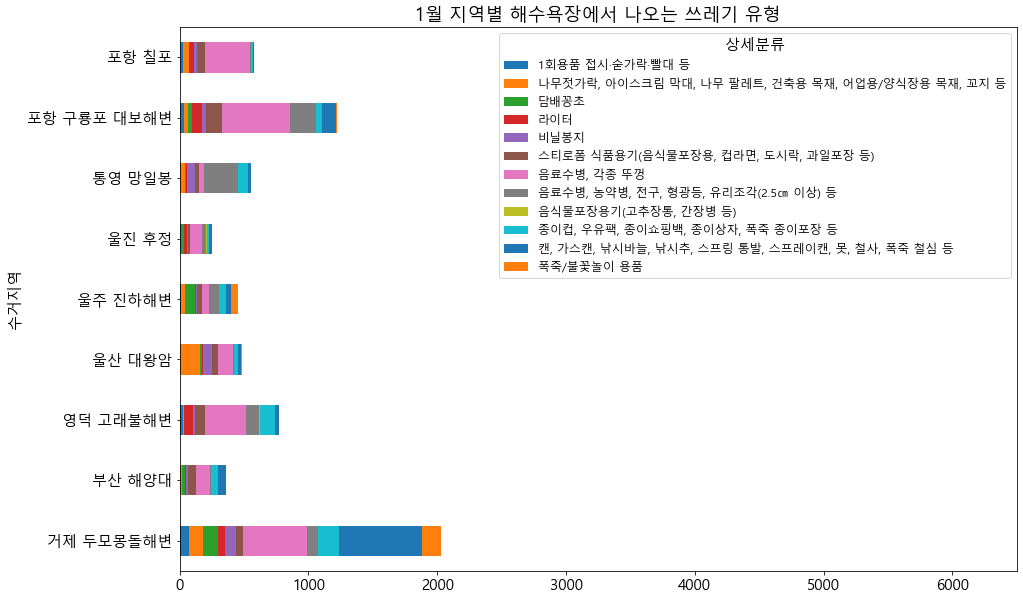

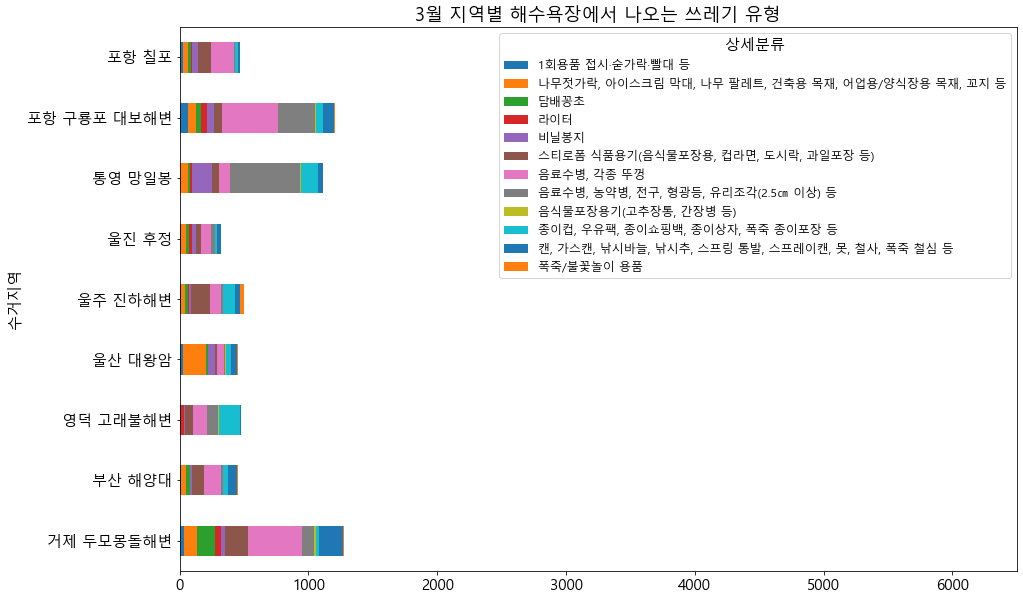

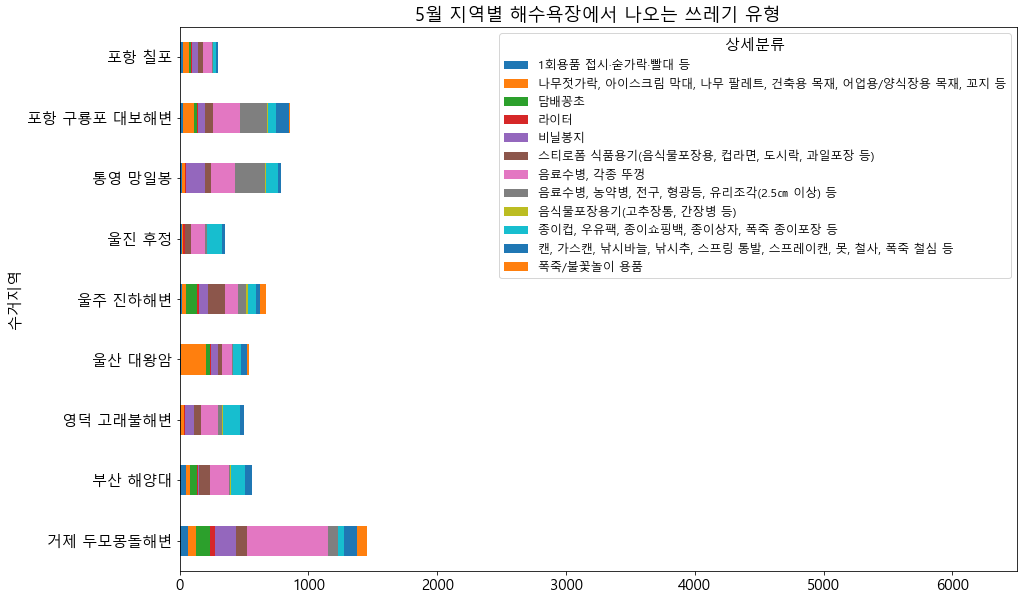

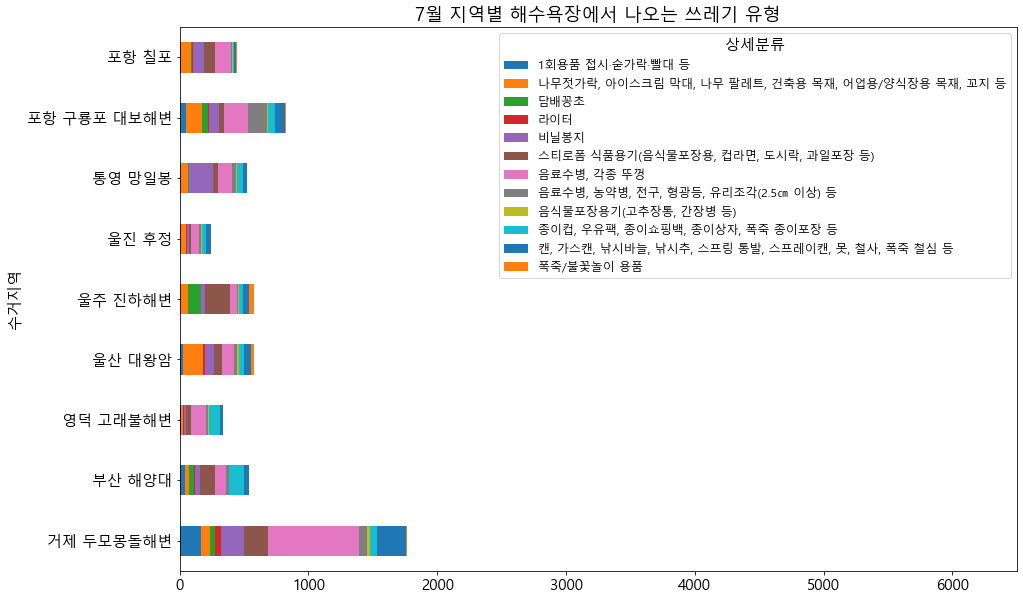

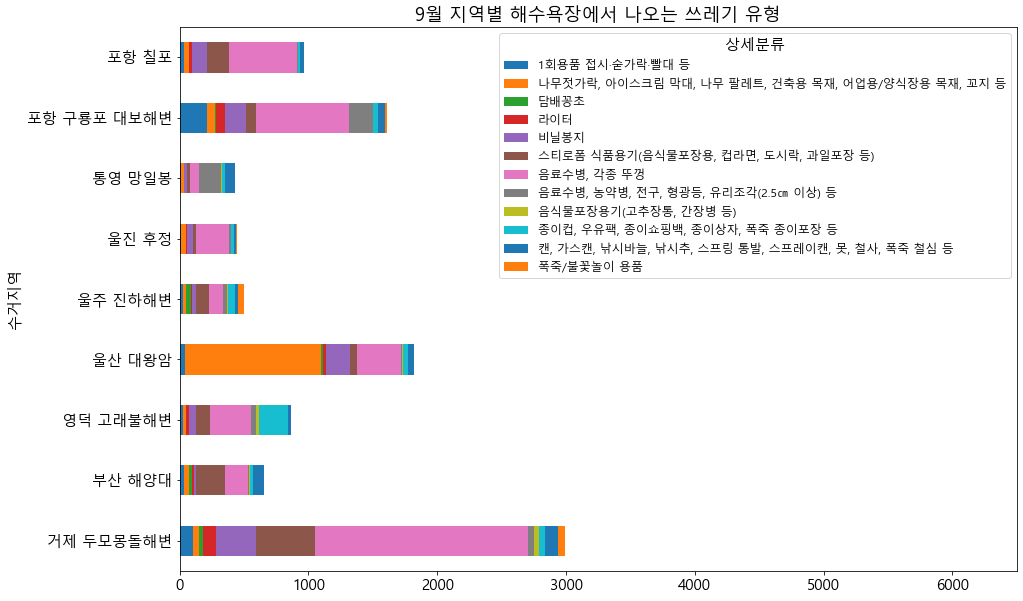

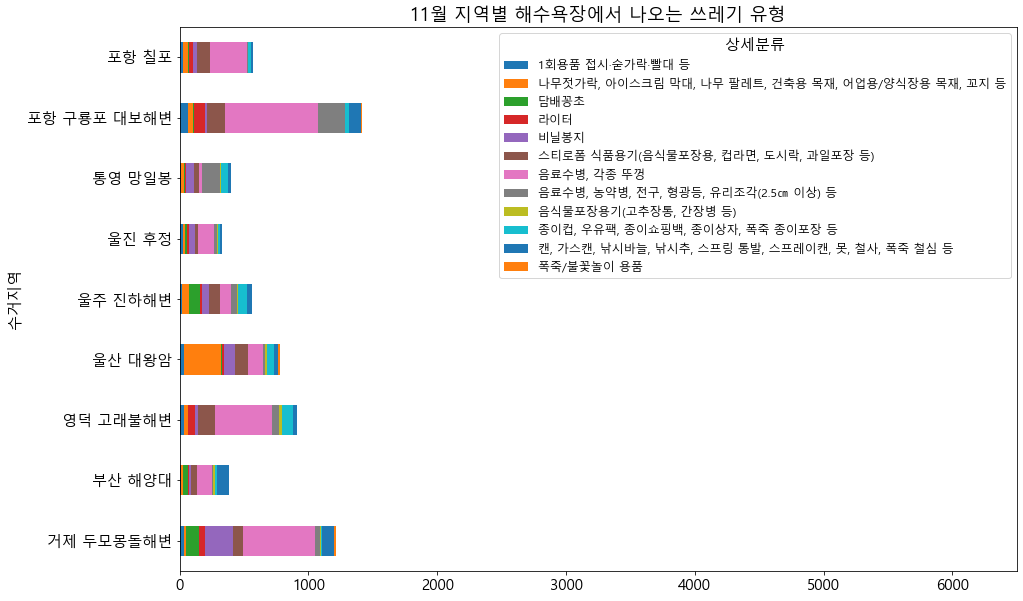

In [778]:
for i in [1,3,5,7,9,11]:
    trash_beach=trash_beach_list[trash_beach_list['년도']>=2016]
    trash_beach=trash_beach[trash_beach['월']==i]
    쓰상2=trash_beach.pivot_table(index=['수거지역','상세분류'],values='개수',aggfunc='sum').reset_index()
    a_pivot=쓰상2.pivot('수거지역','상세분류','개수')
    plt.rcParams["figure.figsize"] = (15, 10)
    a_pivot.plot.barh( stacked=True)
    plt.rc('legend', fontsize=12)
    plt.title(str(i)+"월 지역별 해수욕장에서 나오는 쓰레기 유형")
    plt.xlim((0,6500))
    plt.show()

### 2-2. 쓰레기 수거장별 주변 항구 수 vs 항구에서 나오는 쓰레기 유형과의 관계

In [787]:
trash_harbor

,년도,수거지역,분류,상세분류,개수,위도,경도,월,측정소,항구명
6,2019,통영 망일봉,스티로폼,스티로폼 부표,6,34.848610,128.430967,1,통영,7
10,2019,통영 망일봉,플라스틱류,"밧줄(꼬인 것, 어업용)",1,34.848610,128.430967,3,통영,7
13,2019,통영 망일봉,스티로폼,스티로폼 부표,2,34.848610,128.430967,3,통영,7
14,2019,통영 망일봉,플라스틱류,어망,2,34.848610,128.430967,3,통영,7
27,2019,통영 망일봉,플라스틱류,플라스틱 부표,1,34.848610,128.430967,5,통영,7
...,...,...,...,...,...,...,...,...,...,...
15155,2014,영덕 고래불해변,플라스틱류,"밧줄(꼬인 것, 어업용)",15,36.599835,129.402842,9,후포,3
15156,2014,영덕 고래불해변,플라스틱류,"밧줄(꼬인 것, 어업용)",9,36.599835,129.402842,9,후포,3
15157,2014,영덕 고래불해변,플라스틱류,양식용화학약품용기,1,36.599835,129.402842,9,후포,3
15158,2014,영덕 고래불해변,플라스틱류,"통발, 장어통발용 미끼통",6,36.599835,129.402842,9,후포,3


In [783]:
harbor_cnt=harbor.pivot_table(index='수거지역',
                  values='항구명',
                  aggfunc='count').reset_index()

trash_harbor = pd.merge(trash,harbor_cnt,how='left')

In [784]:
trash_harbor=trash_harbor[(trash_harbor['상세분류']=='스티로폼 어상자')|
                         (trash_harbor['상세분류']=='스티로폼 부표')|
                         (trash_harbor['상세분류']=='가짜미끼, 형광찌, 낚시 미끼통')|
                         (trash_harbor['상세분류']=='밧줄(꼬인 것, 어업용)')|
                         (trash_harbor['상세분류']=='양식용화학약품용기')|
                         (trash_harbor['상세분류']=='플라스틱 부표')|
                         (trash_harbor['상세분류']=='어망')|
                         (trash_harbor['상세분류']=='통발, 장어통발용 미끼통')|
                         (trash_harbor['상세분류']=='낚싯줄')]

In [788]:
trash_harbor.columns=['년도', '수거지역', '분류', '상세분류', '개수', '위도', '경도','월', '측정소', '항구수']

In [789]:
duple_cnt=trash_harbor[['수거지역','항구수']].drop_duplicates()

In [790]:
cnt_count=pd.merge(trash_harbor.pivot_table(index='수거지역',values='개수',aggfunc='sum').reset_index(),duple_cnt,how='left')
cnt_count

,수거지역,개수,항구수
0,거제 두모몽돌해변,6247,5
1,부산 해양대,3573,2
2,영덕 고래불해변,3590,3
3,울산 대왕암,4098,4
4,울주 진하해변,1965,2
5,울진 후정,4316,2
6,통영 망일봉,8782,7
7,포항 구룡포 대보해변,5428,4
8,포항 칠포,10003,8


In [791]:
cnt_count.sort_values('항구수').to_csv('lm.csv',encoding='cp949')

In [793]:
cnt_count.corr(method='pearson')

,개수,항구수
개수,1.000000,0.954401
항구수,0.954401,1.000000


In [187]:
# 회귀식은 r 참고

### 2-3.지역별 어항에서 나오는 유형 비율 막대그래프

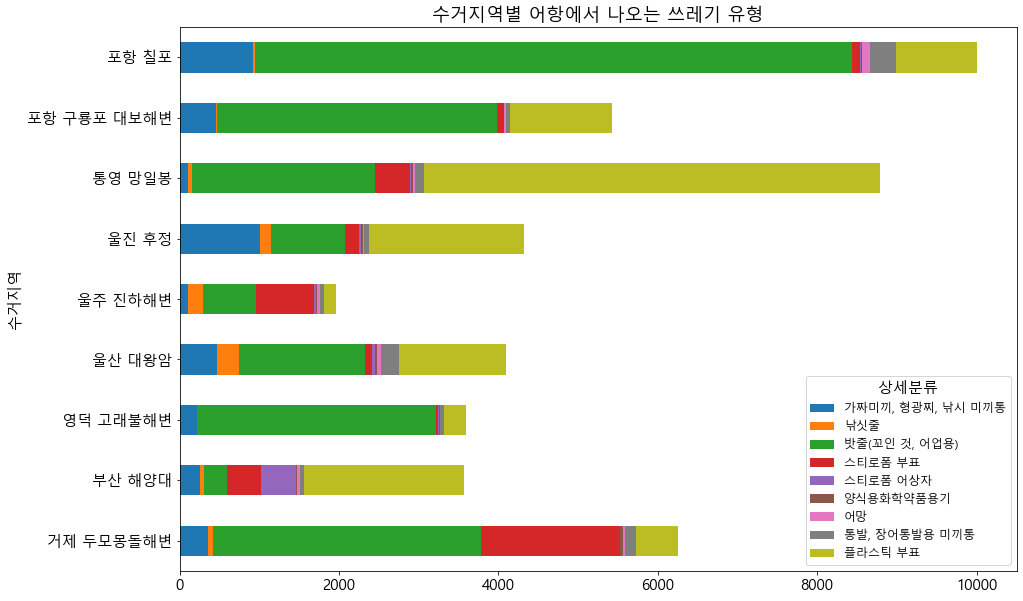

In [794]:
장상개=trash_harbor.pivot_table(index=['수거지역','상세분류'],values='개수',aggfunc='sum').reset_index()
a_pivot=장상개.pivot('수거지역','상세분류','개수')
plt.rcParams["figure.figsize"] = (15, 10)
a_pivot.plot.barh( stacked=True)
plt.title('수거지역별 어항에서 나오는 쓰레기 유형')
plt.show()

# 모델링

### 1. 데이터 결합     쓰레기 + 바람 + 해변   즉 2016년 이후 자료!

trash+해수욕장 방문객 수 df

In [304]:
trash=pd.read_csv('C:\\Users\\User\\BigData\\bigdata\\project/trash.csv',encoding='cp949')
beach=pd.read_csv('C:\\Users\\User\\BigData\\bigdata\\project/merge_beach.csv',encoding='cp949')
trash=trash[(trash['상세분류']=='캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등')|
                 (trash['상세분류']=='나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, 꼬지 등')|
                 (trash['상세분류']=='스티로폼 식품용기(음식물포장용, 컵라면, 도시락, 과일포장 등)')|
                 (trash['상세분류']=='음료수병, 농약병, 전구, 형광등, 유리조각(2.5㎝ 이상) 등')|
                 (trash['상세분류']=='종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등')|
                 (trash['상세분류']=='음료수병, 각종 뚜껑')|
                 (trash['상세분류']=='비닐봉지')|
                 (trash['상세분류']=='1회용품 접시·숟가락·빨대 등')|
                 (trash['상세분류']=='음식물포장용기(고추장통, 간장병 등)')|
                 (trash['상세분류']=='폭죽/불꽃놀이 용품')|
                 (trash['상세분류']=='종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등')|
                 (trash['상세분류']=='담배꽁초')|
                 (trash['상세분류']=='라이터')]

# 쓰레기+바람

In [305]:
trash_m9=trash[trash['월']==9]
trash_m9.head(5)

,년도,수거지역,분류,상세분류,개수,위도,경도,월,측정소
57,2019,통영 망일봉,플라스틱류,"음료수병, 각종 뚜껑",1,34.84861,128.430967,9,통영
58,2019,통영 망일봉,플라스틱류,비닐봉지,1,34.84861,128.430967,9,통영
61,2019,통영 망일봉,플라스틱류,라이터,2,34.84861,128.430967,9,통영
62,2019,통영 망일봉,스티로폼,"스티로폼 식품용기(음식물포장용, 컵라면, 도시락, 과일포장 등)",2,34.84861,128.430967,9,통영
64,2019,통영 망일봉,목재,"나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, ...",2,34.84861,128.430967,9,통영


In [306]:
#풍향 7,8월 평균
wind_avg_78=wind[(wind['월']==7)|(wind['월']==8)].pivot_table(index=['년도','측정소'],values=['평균풍향(deg)','평균풍속(m/s)'],aggfunc='mean').reset_index()
wind_avg_78.head(5)

,년도,측정소,평균풍속(m/s),평균풍향(deg)
0,2008,거제도,3.053472,141.083818
1,2008,마산,3.273645,168.244862
2,2008,부산,2.432783,152.925884
3,2008,통영,2.410911,158.951336
4,2009,거제도,3.841572,118.689435


In [307]:
trash_wind=pd.merge(trash_m9, wind_avg_78,on=['년도','측정소'])
trash_wind.head(5)

,년도,수거지역,분류,상세분류,개수,위도,경도,월,측정소,평균풍속(m/s),평균풍향(deg)
0,2019,통영 망일봉,플라스틱류,"음료수병, 각종 뚜껑",1,34.84861,128.430967,9,통영,1.979944,169.385668
1,2019,통영 망일봉,플라스틱류,비닐봉지,1,34.84861,128.430967,9,통영,1.979944,169.385668
2,2019,통영 망일봉,플라스틱류,라이터,2,34.84861,128.430967,9,통영,1.979944,169.385668
3,2019,통영 망일봉,스티로폼,"스티로폼 식품용기(음식물포장용, 컵라면, 도시락, 과일포장 등)",2,34.84861,128.430967,9,통영,1.979944,169.385668
4,2019,통영 망일봉,목재,"나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, ...",2,34.84861,128.430967,9,통영,1.979944,169.385668


# 쓰레기_바람+해변

In [344]:
visit_beach_78=visit_beach.pivot_table(index=['년도','수거지역','수거장소에 대한해수욕장의 상대적 위치'],values='방문객수',aggfunc='sum').reset_index()
visit_beach_78_dummy=visit_beach_78.pivot(['년도','수거지역'],'수거장소에 대한해수욕장의 상대적 위치','방문객수').reset_index().fillna(0)
trash_wind_beach=pd.merge(trash_wind,visit_beach_78_dummy,on=['년도','수거지역'])

In [345]:
trash_wind_beach.columns

Index(['년도', '수거지역', '분류', '상세분류', '개수', '위도', '경도', '월', '측정소', '평균풍향(deg)',
       '평균풍속(m/s)', '남', '남동', '남서', '동', '북', '북동', '북서', '서', '서북', '일치'],
      dtype='object')

In [346]:
# 필요한 컬럼만 추출
f_trash_wind_beach=trash_wind_beach[['년도', '수거지역', '상세분류', '개수', '위도', '경도', 
       '평균풍속(m/s)', '평균풍향(deg)', '남', '남동', '남서', '동', '북', '북동', '북서', '서',
       '서북', '일치']].copy()

# 더미화
dummy_df=pd.get_dummies(f_trash_wind_beach,columns = ['수거지역','상세분류'])
dummy_df['년도']=dummy_df['년도'].astype('float64')
dummy_df['개수']=dummy_df['개수'].astype('float64')

In [347]:
dummy_df.columns


Index(['년도', '개수', '위도', '경도', '평균풍속(m/s)', '평균풍향(deg)', '남', '남동', '남서', '동',
       '북', '북동', '북서', '서', '서북', '일치', '수거지역_거제 두모몽돌해변', '수거지역_영덕 고래불해변',
       '수거지역_울산 대왕암', '수거지역_울주 진하해변', '수거지역_울진 후정', '수거지역_통영 망일봉',
       '수거지역_포항 구룡포 대보해변', '수거지역_포항 칠포', '상세분류_1회용품 접시·숟가락·빨대 등',
       '상세분류_가전제품, 차량부품, 도자기, 타일, 건전지, 양초 등', '상세분류_가짜미끼, 형광찌, 낚시 미끼통',
       '상세분류_기타 플라스틱', '상세분류_기타 플라스틱 제품, 상자, 바구니, 방수천막 등',
       '상세분류_기타(스폰지, 물휴지 등)', '상세분류_기타(일회용 위생장갑 등)', '상세분류_끈(노끈, 포장용끈)',
       '상세분류_나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, 꼬지 등', '상세분류_낚싯줄',
       '상세분류_농약용기, 살충제', '상세분류_담배꽁초', '상세분류_라이터', '상세분류_밧줄(꼬인 것, 어업용)',
       '상세분류_비닐봉지', '상세분류_세제용기(주방, 세탁, 목욕 등), 화장품', '상세분류_스티로폼 부표',
       '상세분류_스티로폼 식품용기(음식물포장용, 컵라면, 도시락, 과일포장 등)', '상세분류_스티로폼 어상자',
       '상세분류_스티로폼 포장용 충전재(가전제품 충격 완화용) 등', '상세분류_식품용기-음식물포장용, 컵라면, 도시락 등 ',
       '상세분류_약병, 약포장, 주사기 등', '상세분류_양식용 화학약품 용기 ', '상세분류_양식용화학약품용기', '상세분류_어망',
       '상세분류_어업용고기상자 ', '상세분류_옷, 모자, 양말, 천, 장갑(면장갑, 목장갑, 코팅목장갑) 등 

In [348]:
x = dummy_df[['년도', '위도', '경도', '평균풍속(m/s)', '평균풍향(deg)', '남', '남동', '남서', '동',
       '북', '북동', '북서', '서', '서북', '일치', '수거지역_거제 두모몽돌해변', '수거지역_영덕 고래불해변',
       '수거지역_울산 대왕암', '수거지역_울주 진하해변', '수거지역_울진 후정', '수거지역_통영 망일봉',
       '수거지역_포항 구룡포 대보해변', '수거지역_포항 칠포', '상세분류_1회용품 접시·숟가락·빨대 등',
       '상세분류_나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, 꼬지 등', '상세분류_담배꽁초',
       '상세분류_라이터', '상세분류_비닐봉지', '상세분류_스티로폼 식품용기(음식물포장용, 컵라면, 도시락, 과일포장 등)',
       '상세분류_음료수병, 각종 뚜껑', '상세분류_음료수병, 농약병, 전구, 형광등, 유리조각(2.5㎝ 이상) 등',
       '상세분류_음식물포장용기(고추장통, 간장병 등)', '상세분류_종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등',
       '상세분류_캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등',
       '상세분류_폭죽/불꽃놀이 용품']]

y = dummy_df['개수']

# test 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [349]:
def rf(data,n_estimators):

    # 학습 진행
    min_rmse=-1
    for i in n_estimators:
        forest = RandomForestClassifier(n_estimators=i)
        forest.fit(x_train, y_train)

        # 예측
        y_pred = forest.predict(x_test)

        RMSE = mean_squared_error(y_test, y_pred)**0.5
        print(i,' 일 때 RMSE = ',RMSE)
        df=pd.DataFrame(list(zip(list(y_test),list(y_pred))),columns =['실제','예측']).T
        if min_rmse>RMSE:
            df_final=df.copy()
            
        df_final=df
    return df_final

      
rf(dummy_df,[50,75,100,125])

50  일 때 RMSE =  39.21903898450247
75  일 때 RMSE =  38.71132884740687
100  일 때 RMSE =  39.3731184036798
125  일 때 RMSE =  38.871437833520936


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059
실제,11.0,1.0,1.0,8.0,1.0,3.0,5.0,1.0,1.0,6.0,2.0,1.0,6.0,1.0,5.0,14.0,7.0,1.0,4.0,3.0,4.0,3.0,9.0,4.0,10.0,52.0,13.0,79.0,1.0,4.0,32.0,8.0,25.0,5.0,17.0,55.0,4.0,5.0,1.0,7.0,5.0,6.0,21.0,3.0,1.0,7.0,3.0,5.0,150.0,2.0,...,2.0,11.0,2.0,1.0,16.0,10.0,1.0,4.0,13.0,2.0,15.0,2.0,2.0,6.0,26.0,8.0,5.0,2.0,22.0,3.0,12.0,25.0,10.0,5.0,2.0,84.0,2.0,5.0,53.0,10.0,3.0,2.0,1.0,36.0,81.0,3.0,1.0,2.0,9.0,1.0,2.0,1.0,103.0,78.0,1.0,1.0,29.0,12.0,4.0,2.0
예측,4.0,11.0,2.0,8.0,1.0,2.0,43.0,1.0,15.0,4.0,3.0,10.0,9.0,1.0,17.0,16.0,1.0,1.0,2.0,2.0,10.0,2.0,11.0,2.0,1.0,9.0,5.0,43.0,12.0,1.0,1.0,1.0,5.0,30.0,12.0,1.0,17.0,1.0,7.0,5.0,3.0,2.0,1.0,5.0,4.0,5.0,4.0,1.0,35.0,1.0,...,4.0,5.0,1.0,1.0,1.0,8.0,5.0,3.0,4.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,19.0,33.0,72.0,6.0,36.0,7.0,11.0,3.0,2.0,13.0,120.0,2.0,2.0,2.0,6.0,2.0,3.0,9.0,1.0,7.0,1.0,3.0,1.0,7.0,22.0,1.0,2.0,31.0,2.0,11.0,5.0


In [350]:
def ls(x_train, x_test, y_train, y_test):
    lasso = Lasso()

    parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1e-1,1,5,10,20]}

    lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
    
    lasso_regressor.fit(x_train,y_train)

    print(lasso_regressor.best_params_)
    print(lasso_regressor.best_scores_)

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1e-1,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2170176.4868295477, tolerance: 479.7172555785123
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1719409.42879798, tolerance: 380.99730899970484
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2619304.1605479447, tolerance: 568.2303897904986
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

{'alpha': 0.01}


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2981285.7851381353, tolerance: 649.5426393767706
  model = cd_fast.enet_coordinate_descent(


In [351]:
alpha=lasso_regressor.best_params_
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2981285.7851381353, tolerance: 649.5426393767706
  model = cd_fast.enet_coordinate_descent(


In [352]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
print(alpha,' 일 때 RMSE = ',RMSE)
pd.DataFrame(list(zip(list(y_test),list(y_pred))),columns =['실제','예측']).T


{'alpha': 0.01}  일 때 RMSE =  35.681030043016136


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059
실제,11.000000,1.000000,1.000000,8.000000,1.000000,3.000000,5.000000,1.000000,1.000000,6.000000,2.00000,1.000000,6.000000,1.000000,5.000000,14.000000,7.000000,1.000000,4.000000,3.000000,4.000000,3.000000,9.000000,4.00000,10.000000,52.000000,13.000000,79.000000,1.000000,4.000000,32.000000,8.000000,25.000000,5.000000,17.000000,55.000000,4.000000,5.000000,1.000000,7.000000,5.000000,6.000000,21.000000,3.000000,1.0000,7.000000,3.000000,5.000000,150.000000,2.000000,...,2.0000,11.000000,2.000000,1.0000,16.000000,10.000000,1.000000,4.000000,13.000000,2.000000,15.000000,2.000000,2.000000,6.000000,26.000000,8.000000,5.000000,2.000000,22.00000,3.000000,12.000000,25.000000,10.000000,5.000000,2.000000,84.000000,2.00000,5.000000,53.000000,10.000000,3.00000,2.000000,1.000000,36.000000,81.000000,3.000000,1.000000,2.000000,9.000000,1.000000,2.000000,1.000000,103.000000,78.000000,1.000000,1.000000,29.000000,12.000000,4.000000,2.000000
예측,5.337268,10.306808,6.680677,14.263637,17.103202,8.835379,19.732341,6.706012,12.479631,3.206296,33.76064,10.592174,11.452162,10.724119,4.921446,45.961569,11.594451,33.880991,7.583236,8.835379,24.613683,23.369834,11.796131,11.40296,17.707308,11.452162,11.589566,35.827611,11.063025,6.972512,20.819393,14.285852,12.572883,5.463406,12.725404,8.900478,6.476665,29.009715,-1.002491,2.661705,0.407728,7.583236,14.998286,3.234472,-1.3592,41.957481,26.092454,12.354188,16.558811,13.696698,...,7.2567,26.491214,12.424365,13.1937,8.284326,0.375138,26.937955,7.351081,29.304234,23.657664,8.541521,19.447678,3.092418,2.900833,7.671849,14.009062,11.915275,3.488339,10.76054,5.465801,8.492993,25.854295,17.940775,13.275055,-1.002491,5.227429,15.49592,21.863256,19.729941,55.914776,4.98958,14.009062,9.423871,9.614187,26.578494,10.457918,25.224817,5.298015,3.135598,7.496949,14.056857,10.857676,11.166111,22.069437,14.285852,13.955202,48.763564,9.891511,10.306808,5.146823


# 해수욕장만 고려

In [277]:
only_beach=dummy_df[['년도', '개수', '남', '남동', '남서', '동',
       '북', '북동', '북서', '서', '서북', '일치', '수거지역_거제 두모몽돌해변', '수거지역_영덕 고래불해변',
       '수거지역_울산 대왕암', '수거지역_울주 진하해변', '수거지역_울진 후정', '수거지역_통영 망일봉',
       '수거지역_포항 구룡포 대보해변', '수거지역_포항 칠포', '상세분류_1회용품 접시·숟가락·빨대 등',
       '상세분류_나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, 꼬지 등', '상세분류_담배꽁초',
       '상세분류_라이터', '상세분류_비닐봉지', '상세분류_스티로폼 식품용기(음식물포장용, 컵라면, 도시락, 과일포장 등)',
       '상세분류_음료수병, 각종 뚜껑', '상세분류_음료수병, 농약병, 전구, 형광등, 유리조각(2.5㎝ 이상) 등',
       '상세분류_음식물포장용기(고추장통, 간장병 등)', '상세분류_종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등',
       '상세분류_캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등',
       '상세분류_폭죽/불꽃놀이 용품']]

In [278]:
x = only_beach[['년도', '남', '남동', '남서', '동',
       '북', '북동', '북서', '서', '서북', '일치', '수거지역_거제 두모몽돌해변', '수거지역_영덕 고래불해변',
       '수거지역_울산 대왕암', '수거지역_울주 진하해변', '수거지역_울진 후정', '수거지역_통영 망일봉',
       '수거지역_포항 구룡포 대보해변', '수거지역_포항 칠포', '상세분류_1회용품 접시·숟가락·빨대 등',
       '상세분류_나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, 꼬지 등', '상세분류_담배꽁초',
       '상세분류_라이터', '상세분류_비닐봉지', '상세분류_스티로폼 식품용기(음식물포장용, 컵라면, 도시락, 과일포장 등)',
       '상세분류_음료수병, 각종 뚜껑', '상세분류_음료수병, 농약병, 전구, 형광등, 유리조각(2.5㎝ 이상) 등',
       '상세분류_음식물포장용기(고추장통, 간장병 등)', '상세분류_종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등',
       '상세분류_캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등',
       '상세분류_폭죽/불꽃놀이 용품']]

y = only_beach['개수']

# test 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [282]:
def rf(x_train, x_test, y_train, y_test,n_estimators):
   
    # 학습 진행
    min_rmse=-1
    for i in n_estimators:
        forest = RandomForestClassifier(n_estimators=i)
        forest.fit(x_train, y_train)

        # 예측
        y_pred = forest.predict(x_test)

        RMSE = mean_squared_error(y_test, y_pred)**0.5
        print(i,' 일 때 RMSE = ',RMSE)
        df=pd.DataFrame(list(zip(list(y_test),list(y_pred))),columns =['실제','예측']).T
        if min_rmse>RMSE:
            df_final=df.copy()
            
        df_final=df
    return df_final

      
rf(x_train, x_test, y_train, y_test,[50,75,100,125])

50  일 때 RMSE =  32.5486976931334
75  일 때 RMSE =  25.68430540824099
100  일 때 RMSE =  24.79766220095982
125  일 때 RMSE =  29.022906710459768


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
실제,12.0,17.0,2.0,2.0,7.0,21.0,4.0,4.0,3.0,1.0,1.0,6.0,10.0,125.0,6.0,8.0,1.0,21.0,1.0,1.0,1.0,1.0,25.0,8.0,2.0,2.0,13.0,16.0,67.0,55.0,125.0,15.0,2.0,21.0,1.0,22.0,5.0,9.0,129.0,5.0,12.0,1.0,5.0,15.0,5.0,19.0,1.0,6.0,2.0,1.0,3.0,42.0,2.0,14.0,8.0,10.0,2.0,10.0,7.0,2.0,5.0,3.0,19.0,1.0,4.0,21.0,1.0,51.0,45.0,4.0,1.0,3.0,88.0,2.0,36.0,4.0,52.0,2.0,108.0
예측,1.0,12.0,3.0,2.0,1.0,22.0,11.0,3.0,2.0,30.0,1.0,9.0,2.0,19.0,20.0,3.0,2.0,3.0,1.0,5.0,18.0,2.0,5.0,2.0,2.0,2.0,2.0,16.0,19.0,22.0,1.0,3.0,1.0,102.0,1.0,21.0,1.0,5.0,1.0,3.0,15.0,26.0,25.0,4.0,3.0,5.0,3.0,1.0,1.0,3.0,4.0,78.0,8.0,3.0,5.0,2.0,28.0,31.0,3.0,12.0,1.0,2.0,15.0,2.0,2.0,9.0,22.0,5.0,20.0,2.0,3.0,5.0,78.0,2.0,29.0,2.0,78.0,2.0,58.0


In [341]:
def ls(x_train, x_test, y_train, y_test):
    lasso = Lasso()

    parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1e-1,1,5,10,20]}

    lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
    
    lasso_regressor.fit(x_train,y_train)

    print(lasso_regressor.best_params_)
    print(lasso_regressor.best_scores_)

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1e-1,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6124740.122538853, tolerance: 1384.554442435597
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4308029.831863402, tolerance: 1393.1855440346565
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5935337.585446341, tolerance: 1325.1717256059007
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

{'alpha': 0.01}


In [342]:
alpha=lasso_regressor.best_params_
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)

In [343]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
print(alpha,' 일 때 RMSE = ',RMSE)
pd.DataFrame(list(zip(list(y_test),list(y_pred))),columns =['실제','예측']).T


{'alpha': 0.01}  일 때 RMSE =  44.91943992108445


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666,2667,2668,2669
실제,1.000000,1.000000,1.000000,1.000000,33.000000,3.000000,1.000000,2.000000,10.000000,16.000000,1.000000,5.000000,15.0000,1.000000,10.000000,57.000000,1.000000,28.000000,5.000000,1.000000,5.0000,4.000000,3.000000,14.00000,14.000000,1.000000,2.000000,43.000000,33.000000,5.000000,6.000000,19.000000,1.000000,1.000000,2.000000,1.000000,11.00000,9.000000,172.000000,150.000000,3.000000,36.000000,35.000000,1253.000000,1.000000,7.000000,6.000000,12.000000,13.000000,6.000000,...,2.000000,1.000000,27.000000,6.000000,2.000000,3.000000,2.000000,2.000000,1.000000,10.000000,14.000000,5.000000,70.000000,5.000000,20.000000,2.000000,1.000000,35.000000,6.000000,3.000000,20.000000,2.000000,1.000000,5.00000,210.000000,11.000000,1.00000,6.000000,2.000000,14.000000,6.000000,1.000000,2.000000,1.000000,1.000000,5.000000,26.000000,2.000000,6.000000,50.000000,142.00000,1.000000,1.00000,44.000000,10.000000,4.000000,1.000000,12.000000,3.000000,6.000000
예측,-2.347856,23.444852,-2.502388,1.983056,11.895965,21.119834,27.188738,14.587363,3.543811,23.048453,22.009525,16.113925,14.8807,14.590319,8.736535,18.215482,7.742301,16.578192,2.204429,7.963006,19.6503,6.092817,19.437871,8.16119,9.969123,7.080394,10.599104,21.412798,17.725356,15.554801,11.735786,13.997814,9.226102,22.828406,6.756464,5.166271,8.67737,9.921227,16.916941,19.286258,19.664053,17.672083,11.475698,34.332279,13.990113,15.304898,19.193436,27.340478,18.033595,9.883495,...,16.633104,10.551016,9.299002,10.255491,12.229852,0.517391,9.966934,18.215482,8.581906,19.193436,8.143603,9.883495,32.956603,12.182383,26.534163,22.417211,3.357986,24.325082,11.126236,20.840891,8.449504,4.110166,11.260609,17.73497,15.574547,18.241356,26.28066,14.982476,10.389857,5.016573,10.094188,11.409986,9.555977,2.718258,14.776787,10.438121,27.766663,25.525479,10.329159,19.361377,43.23859,12.182383,12.90566,14.580457,29.303327,35.565154,18.436949,14.587058,10.723523,21.631188


In [ ]:
y_train

# 바람만 고려

In [323]:
trash=pd.read_csv('C:\\Users\\User\\BigData\\bigdata\\project/trash.csv',encoding='cp949')
wind=pd.read_csv('C:\\Users\\User\\BigData\\bigdata\\project/wind_avg.csv',encoding='cp949')

In [324]:
wind.columns

Index(['년도', '월', '평균풍향(deg)', '평균풍속(m/s)', '측정소'], dtype='object')

In [325]:
wind_shift2=wind[['평균풍향(deg)','평균풍속(m/s)','측정소']].shift(1)
wind_shift2.columns=['평균풍향(deg)_sh', '평균풍속(m/s)_sh', '측정소_sh']
wind_shift=pd.concat([wind,wind_shift2],axis=1)[['년도','월','평균풍향(deg)_sh', '평균풍속(m/s)_sh', '측정소_sh']]
wind_shift=wind_shift[wind_shift['년도']>=2010]

In [326]:
def season(data):
    if (data['월']==1)|(data['월']==2):
        return 3
    elif (data['월']==3)|(data['월']==4):
        return 5
    elif (data['월']==5)|(data['월']==6):
        return 7
    elif (data['월']==7)|(data['월']==8):
        return 9
    elif (data['월']==9)|(data['월']==10):
        return 11
    elif (data['월']==11)|(data['월']==12):
        return 1

In [327]:
wind_shift['월']=wind_shift.apply(season,axis=1)

In [328]:
wind_shift.head(10)

,년도,월,평균풍향(deg)_sh,평균풍속(m/s)_sh,측정소_sh
24,2010,3,186.491712,2.083260,거제도
25,2010,3,203.935185,1.756465,거제도
26,2010,5,147.685584,3.353886,거제도
27,2010,5,130.169993,4.101062,거제도
28,2010,7,150.123784,3.306272,거제도
29,2010,7,142.873748,3.028388,거제도
30,2010,9,131.394975,2.733824,거제도
31,2010,9,154.802428,2.386544,거제도
32,2010,11,152.807743,2.501510,거제도
33,2010,11,140.824396,2.890270,거제도


In [329]:
shift_wind=wind_shift.pivot_table(index=['년도','월','측정소_sh'],values=['평균풍향(deg)_sh','평균풍속(m/s)_sh'],aggfunc='mean').reset_index()
shift_wind.columns=['년도', '월', '측정소', '평균풍향(deg)', '평균풍속(m/s)']

In [330]:
trash_wind=pd.merge(trash,shift_wind,on=['년도','월','측정소'])
trash_wind.head(5)

,년도,수거지역,분류,상세분류,개수,위도,경도,월,측정소,평균풍향(deg),평균풍속(m/s)
0,2019,통영 망일봉,플라스틱류,"끈(노끈, 포장용끈)",1,34.84861,128.430967,1,통영,1.838703,174.622848
1,2019,통영 망일봉,금속,"캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등",1,34.84861,128.430967,1,통영,1.838703,174.622848
2,2019,통영 망일봉,목재,"나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, ...",1,34.84861,128.430967,1,통영,1.838703,174.622848
3,2019,통영 망일봉,종이,"종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등",1,34.84861,128.430967,1,통영,1.838703,174.622848
4,2019,통영 망일봉,천연 섬유,"옷, 모자, 양말, 천, 장갑(면장갑, 목장갑, 코팅목장갑) 등 천연 섬유만 해당",1,34.84861,128.430967,1,통영,1.838703,174.622848


In [331]:
f_trash_wind=trash_wind[['년도', '수거지역', '월', '분류', '개수',
       '평균풍향(deg)', '평균풍속(m/s)']]
dummy_trash_wind=pd.get_dummies(f_trash_wind,columns = ['수거지역','분류'])
dummy_trash_wind['개수']=dummy_trash_wind['개수'].astype('float')
dummy_trash_wind['년도']=dummy_trash_wind['년도'].astype('float')
dummy_trash_wind['월']=dummy_trash_wind['월'].astype('float')

In [334]:
x = dummy_trash_wind[['년도', '월', '평균풍향(deg)', '평균풍속(m/s)', '수거지역_거제 두모몽돌해변',
       '수거지역_부산 해양대', '수거지역_영덕 고래불해변', '수거지역_울산 대왕암', '수거지역_울주 진하해변',
       '수거지역_울진 후정', '수거지역_통영 망일봉', '수거지역_포항 구룡포 대보해변', '수거지역_포항 칠포', '분류_고무',
       '분류_금속', '분류_기타(+혼합재질)', '분류_기타(스폰지, 물휴지 등)', '분류_기타(일회용 위생장갑 등)',
       '분류_목재', '분류_스티로폼', '분류_식품용기-음식물포장용, 컵라면, 도시락 등 ', '분류_양식용 화학약품 용기 ',
       '분류_어업용고기상자 ', '분류_유리', '분류_종이', '분류_천연 섬유', '분류_파편',
       '분류_파편(노끈, 밧줄, 어망 등으로 구분할 수 없는 경우)', '분류_포장지(라면봉지, 과자봉지 등)', '분류_플라스틱류',
       '분류_필름형 풍선']]

y = dummy_trash_wind['개수']

# test 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [335]:
def rf(x_train, x_test, y_train, y_test,n_estimators,):
    # 학습 진행
    min_rmse=-1
    for i in n_estimators:
        forest = RandomForestClassifier(n_estimators=i)
        forest.fit(x_train, y_train)

        # 예측
        y_pred = forest.predict(x_test)

        RMSE = mean_squared_error(y_test, y_pred)**0.5
        print(i,' 일 때 RMSE = ',RMSE)
        df=pd.DataFrame(list(zip(list(y_test),list(y_pred))),columns =['실제','예측']).T
        if min_rmse>RMSE:
            df_final=df.copy()
            
        df_final=df
    return df_final


rf(x_train, x_test, y_train, y_test,[50,75,100,125])

50  일 때 RMSE =  44.628541781835466
75  일 때 RMSE =  46.971307681587405
100  일 때 RMSE =  47.02450154247626
125  일 때 RMSE =  45.64483061418623


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666,2667,2668,2669
실제,1.0,1.0,1.0,1.0,33.0,3.0,1.0,2.0,10.0,16.0,1.0,5.0,15.0,1.0,10.0,57.0,1.0,28.0,5.0,1.0,5.0,4.0,3.0,14.0,14.0,1.0,2.0,43.0,33.0,5.0,6.0,19.0,1.0,1.0,2.0,1.0,11.0,9.0,172.0,150.0,3.0,36.0,35.0,1253.0,1.0,7.0,6.0,12.0,13.0,6.0,...,2.0,1.0,27.0,6.0,2.0,3.0,2.0,2.0,1.0,10.0,14.0,5.0,70.0,5.0,20.0,2.0,1.0,35.0,6.0,3.0,20.0,2.0,1.0,5.0,210.0,11.0,1.0,6.0,2.0,14.0,6.0,1.0,2.0,1.0,1.0,5.0,26.0,2.0,6.0,50.0,142.0,1.0,1.0,44.0,10.0,4.0,1.0,12.0,3.0,6.0
예측,14.0,1.0,2.0,3.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,15.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,8.0,22.0,10.0,1.0,3.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,7.0,4.0,2.0,2.0,1.0,1.0,352.0,1.0,2.0,2.0,32.0,2.0,4.0,...,3.0,1.0,6.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,4.0,81.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,6.0,6.0,8.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,11.0,1.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0,2.0,7.0,3.0,6.0,3.0


In [336]:
def ls(x_train, x_test, y_train, y_test):
    lasso = Lasso()

    parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1e-1,1,5,10,20]}

    lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
    
    lasso_regressor.fit(x_train,y_train)

    print(lasso_regressor.best_params_)
    print(lasso_regressor.best_scores_)

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1e-1,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6124740.122538853, tolerance: 1384.554442435597
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4308029.831863402, tolerance: 1393.1855440346565
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5935337.585446341, tolerance: 1325.1717256059007
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

{'alpha': 0.01}


In [337]:
alpha=lasso_regressor.best_params_
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)

In [338]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
print(alpha,' 일 때 RMSE = ',RMSE)
pd.DataFrame(list(zip(list(y_test),list(y_pred))),columns =['실제','예측']).T


{'alpha': 0.01}  일 때 RMSE =  44.91943992108445


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666,2667,2668,2669
실제,1.000000,1.000000,1.000000,1.000000,33.000000,3.000000,1.000000,2.000000,10.000000,16.000000,1.000000,5.000000,15.0000,1.000000,10.000000,57.000000,1.000000,28.000000,5.000000,1.000000,5.0000,4.000000,3.000000,14.00000,14.000000,1.000000,2.000000,43.000000,33.000000,5.000000,6.000000,19.000000,1.000000,1.000000,2.000000,1.000000,11.00000,9.000000,172.000000,150.000000,3.000000,36.000000,35.000000,1253.000000,1.000000,7.000000,6.000000,12.000000,13.000000,6.000000,...,2.000000,1.000000,27.000000,6.000000,2.000000,3.000000,2.000000,2.000000,1.000000,10.000000,14.000000,5.000000,70.000000,5.000000,20.000000,2.000000,1.000000,35.000000,6.000000,3.000000,20.000000,2.000000,1.000000,5.00000,210.000000,11.000000,1.00000,6.000000,2.000000,14.000000,6.000000,1.000000,2.000000,1.000000,1.000000,5.000000,26.000000,2.000000,6.000000,50.000000,142.00000,1.000000,1.00000,44.000000,10.000000,4.000000,1.000000,12.000000,3.000000,6.000000
예측,-2.347856,23.444852,-2.502388,1.983056,11.895965,21.119834,27.188738,14.587363,3.543811,23.048453,22.009525,16.113925,14.8807,14.590319,8.736535,18.215482,7.742301,16.578192,2.204429,7.963006,19.6503,6.092817,19.437871,8.16119,9.969123,7.080394,10.599104,21.412798,17.725356,15.554801,11.735786,13.997814,9.226102,22.828406,6.756464,5.166271,8.67737,9.921227,16.916941,19.286258,19.664053,17.672083,11.475698,34.332279,13.990113,15.304898,19.193436,27.340478,18.033595,9.883495,...,16.633104,10.551016,9.299002,10.255491,12.229852,0.517391,9.966934,18.215482,8.581906,19.193436,8.143603,9.883495,32.956603,12.182383,26.534163,22.417211,3.357986,24.325082,11.126236,20.840891,8.449504,4.110166,11.260609,17.73497,15.574547,18.241356,26.28066,14.982476,10.389857,5.016573,10.094188,11.409986,9.555977,2.718258,14.776787,10.438121,27.766663,25.525479,10.329159,19.361377,43.23859,12.182383,12.90566,14.580457,29.303327,35.565154,18.436949,14.587058,10.723523,21.631188


# 다항회귀분석